<a href="https://colab.research.google.com/github/m-hefnawy/Pytorch-Tutorial-YouTube/blob/main/CNN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Convert MNIST Image files into Tensor of 4-Dimensions (# of images, Height, Width, Color Channels)
transform = transforms.ToTensor()

In [4]:
# Train Data
train_data = datasets.MNIST(root = '/cnn_data', train = True, download = True, transform = transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 203612866.66it/s]

Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 23170561.18it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33694800.01it/s]

Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 13885225.05it/s]


Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [5]:
# Test Data
test_data = datasets.MNIST(root = '/cnn_data', train = False, download = True, transform = transform)

In [10]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: /cnn_data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: /cnn_data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [12]:
# current directory
!pwd

/content


In [13]:
#list of folders
!ls

sample_data


In [19]:
# going back/up
%cd ../

/


In [21]:
#list of folders where we can find cnn_data available.
!ls

bin	  cuda-keyring_1.0-1_all.deb  home    lib64   NGC-DL-CONTAINER-LICENSE	run   tmp
boot	  datalab		      kaggle  libx32  opt			sbin  tools
cnn_data  dev			      lib     media   proc			srv   usr
content   etc			      lib32   mnt     root			sys   var


In [17]:
%cd cnn_data/

/bin/bash: line 1: cd: cnn_data/: No such file or directory


In [22]:
!ls

bin	  cuda-keyring_1.0-1_all.deb  home    lib64   NGC-DL-CONTAINER-LICENSE	run   tmp
boot	  datalab		      kaggle  libx32  opt			sbin  tools
cnn_data  dev			      lib     media   proc			srv   usr
content   etc			      lib32   mnt     root			sys   var


In [23]:
# Coming back to our directory
%cd ../content/

/content


In [24]:
!pwd

/content


In [25]:
# Create a small batch size for images (10), shuffle only train data
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)

In [26]:
# Define CNN model
# Describe convolutional layers (examples)
# one image, 6 feature maps, kernel size = 3*3, one move/stire
conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1)
# output of conv1 is 6, linked to conve 2
conv2 = nn.Conv2d(in_channels=6, out_channels=18, kernel_size=3, stride=1)

In [27]:
# one imaage from MNIST
for i, (X_train, y_train) in enumerate(train_data):
  break

In [29]:
X_train.shape # we can see a 2d image (28, 28)

torch.Size([1, 28, 28])

In [30]:
# change the image to 4d batch
x = X_train.view(1,1,28,28)
x.shape

torch.Size([1, 1, 28, 28])

In [31]:
#Perform first convolution
x = F.relu(conv1(x)) # Rectified Linear Unit as activation function

In [32]:
# 1 image
# 6 filter
# 26x26 as we didn't use padding, so image shrinked
x.shape

torch.Size([1, 6, 26, 26])

In [33]:
# pass the image through Pooling
x = F.max_pool2d(x, 2,2) # kernel of 2 and stride of 2

In [34]:
# 26 /2 = 13
x.shape

torch.Size([1, 6, 13, 13])

In [35]:
# Run second convlutional layer
x = F.relu(conv2(x))

In [36]:
x.shape # no padding, we lost another two pixels

torch.Size([1, 18, 11, 11])

In [37]:
# Pooling layer
x =F.max_pool2d(x, 2, 2)

In [38]:
x.shape # 11/2 = 5.5 rounded down to 5

torch.Size([1, 18, 5, 5])

In [39]:
# Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 18, 3, 1)
    # Fully connected layer
    self.fc1 = nn.Linear(5*5*18, 120) # 120 is an arbitary number
    self.fc2 = nn.Linear(120, 64)
    self.fc3 = nn.Linear(64, 10) # 10 is the number of outputs

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2) # 2x2 kernal and stride 2
    # second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2) # 2x2 kernal and stride 2

    # Re-view the data to flatten out
    X = X.view (-1, 18*5*5) # negative one so that we can vary the batch size

    # Fully connected layer
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)

In [40]:
# Create and instance of the model
# set the seed
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 18, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=450, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [41]:
# Loss function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001) # it will take longer time

In [43]:
import time
start_time = time.time()

# create variables to track things
epochs = 10
train_losses =[]
test_losses = []
train_correct = []
test_correct = []

# For loop for Epochs training
for i in range(epochs):
  trn_corr = 0 # initiate train correct = 0
  tst_corr = 0
  # Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1 # start batches at 1
    y_pred = model(X_train) # get predicted values from training set. it is 2d (not flatten yet)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. indexed off the first point
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch
    trn_corr += batch_corr # keep track as we go along in training

    # update paramters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print out some results
    if b%600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  # Test
  with torch.no_grad(): # no update for weighs and biased during the test
    for b, (X_test, y_test) in enumerate (test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
total = current_time - start_time

print(f'Training took : {total/60} minutes!')

Epoch: 0 Batch: 600 Loss: 0.0013756841653957963
Epoch: 0 Batch: 1200 Loss: 0.2430274486541748
Epoch: 0 Batch: 1800 Loss: 0.10429733991622925
Epoch: 0 Batch: 2400 Loss: 0.0015936419367790222
Epoch: 0 Batch: 3000 Loss: 0.009865795262157917
Epoch: 0 Batch: 3600 Loss: 0.03862058371305466
Epoch: 0 Batch: 4200 Loss: 0.014530663378536701
Epoch: 0 Batch: 4800 Loss: 0.012530693784356117
Epoch: 0 Batch: 5400 Loss: 0.1540246158838272
Epoch: 0 Batch: 6000 Loss: 0.00229745265096426
Epoch: 1 Batch: 600 Loss: 0.0001307392813032493
Epoch: 1 Batch: 1200 Loss: 0.08793777227401733
Epoch: 1 Batch: 1800 Loss: 0.39959031343460083
Epoch: 1 Batch: 2400 Loss: 0.006016529630869627
Epoch: 1 Batch: 3000 Loss: 0.0027423675637692213
Epoch: 1 Batch: 3600 Loss: 0.0006117163575254381
Epoch: 1 Batch: 4200 Loss: 0.009220568463206291
Epoch: 1 Batch: 4800 Loss: 0.3068808317184448
Epoch: 1 Batch: 5400 Loss: 0.0016840792959555984
Epoch: 1 Batch: 6000 Loss: 0.00918842013925314
Epoch: 2 Batch: 600 Loss: 0.03134945034980774
Ep

In [67]:
# Graph loss at each epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label ='training loss')
plt.plot(test_losses, label = 'validation loss')
plt.title('loss at epoch')
plt.legent()

AttributeError: 'builtin_function_or_method' object has no attribute 'item'

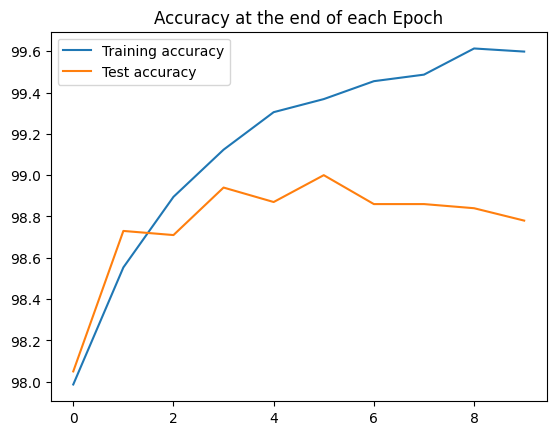

In [69]:
# Graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label='Training accuracy')
plt.plot([t/100 for t in test_correct], label='Test accuracy')
plt.title('Accuracy at the end of each Epoch')
plt.legend()

In [70]:
test_load_everyting = DataLoader(test_data, batch_size = 10000, shuffle = False)

In [72]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everyting:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [75]:
# How many are correct
correct.item()/len(test_data) * 100

98.78

In [76]:
# Grab an image
test_data[4143] # tensor with an image in it.... at the end it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [78]:
#Reshape
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

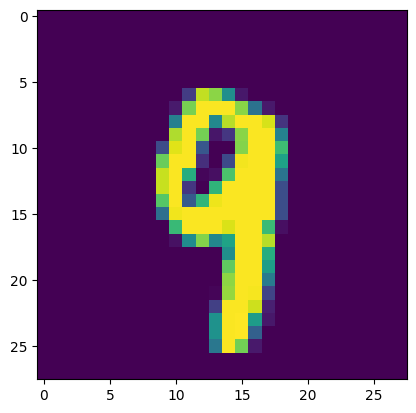

In [79]:
plt.imshow(test_data[4143][0].reshape(28,28))

In [80]:
# pass the image to the model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1, 1, 28,28)) # batch size 1, 1 color channel, 28X28 size


In [81]:
# check the new prediction
new_prediction

tensor([[-1.8260e+01, -1.6639e+01, -2.0921e+01, -1.9143e+01, -8.4250e+00,
         -1.6945e+01, -2.0824e+01, -9.3225e+00, -1.3369e+01, -3.1037e-04]])

In [82]:
# chedk the heights probability
new_prediction.argmax()

tensor(9)